# Project Analysis



In [1]:
## headers
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import date

from matplotlib import pyplot as plt

In [2]:
##testing add

## Ryan adding to branch ryan

Superstore = pd.read_csv("Superstore.csv")
ss = Superstore

# Data Preparation

In [3]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:


ss["Pcnt Profit"] = 100*ss["Profit"].divide(ss["Sales"]-ss["Profit"])
ss.loc[ss["Profit"]>0,"Pcnt Profit"] = 100*ss["Profit"].divide(ss["Sales"])

## to eplain this first, getting indexes of each slash then uging that to slice
ss['Opos1'] = ss.apply(lambda x: x["Order Date"].find('/', 0), axis=1)
ss['Opos2'] = ss.apply(lambda x: x["Order Date"].find('/', x["Opos1"]+1), axis=1)

ss["OrderMonth"] = ss.apply(lambda x: int(x["Order Date"][0:x["Opos1"]]), axis=1)
ss["OrderDay"] = ss.apply(lambda x: int(x["Order Date"][x["Opos1"]+1:x["Opos2"]]), axis=1)
ss["OrderYear"] = ss.apply(lambda x: int(x["Order Date"][x["Opos2"]+1:]), axis=1)
ss["OrderDateObj"] = ss.apply(lambda x: date(x["OrderYear"], x["OrderMonth"], x["OrderDay"]), axis=1)

ss['Spos1'] = ss.apply(lambda x: x["Ship Date"].find('/', 0), axis=1)
ss['Spos2'] = ss.apply(lambda x: x["Ship Date"].find('/', x["Spos1"]+1), axis=1)

ss["ShipMonth"] = ss.apply(lambda x: int(x["Ship Date"][0:x["Spos1"]]), axis=1)
ss["ShipDay"] = ss.apply(lambda x: int(x["Ship Date"][x["Spos1"]+1:x["Spos2"]]), axis=1)
ss["ShipYear"] = ss.apply(lambda x: int(x["Ship Date"][x["Spos2"]+1:]), axis=1)
ss["ShipDateObj"] = ss.apply(lambda x: date(x["ShipYear"], x["ShipMonth"], x["ShipDay"]), axis=1)



ss["DaysToShip"] = ss.apply(lambda x: (x["ShipDateObj"] - x["OrderDateObj"]).days, axis=1)
#ok, so by using a time and date library i dont have to worry about leap days or any of that 
ss

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,OrderDay,OrderYear,OrderDateObj,Spos1,Spos2,ShipMonth,ShipDay,ShipYear,ShipDateObj,DaysToShip
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,2016,2016-11-08,2,5,11,11,2016,2016-11-11,3
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,2016,2016-11-08,2,5,11,11,2016,2016-11-11,3
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,12,2016,2016-06-12,1,4,6,16,2016,2016-06-16,4
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,2015,2015-10-11,2,5,10,18,2015,2015-10-18,7
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,2015,2015-10-11,2,5,10,18,2015,2015-10-18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,21,2014,2014-01-21,1,4,1,23,2014,2014-01-23,2
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5


In [5]:
ss = Superstore
wh = pd.DataFrame()
ss_grouped = ss.groupby(["OrderYear","OrderMonth","Region","State","Ship Mode","Segment","Category","Sub-Category"])
wh["total_sales"] = ss_grouped["Sales"].sum()
wh["sold_items"] = ss_grouped["Quantity"].sum()
wh["total_revenue"] = ss_grouped["Sales"].sum()
wh["total_profit"] = ss_grouped["Profit"].sum()
wh

total_sales  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category                
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders             3.540   
                                                                                   Labels             11.784   
                                                                                   Storage           272.736   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners           5.940   
                             Michigan   Standard Class Consumer    Furniture       Furnishings       287.670   
...                                                                                                      ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage          1003.620   
                                                       Corporate   Furniture       Furnishings        78.080   
                                                                   Office Supplies Binders            19.776   
                                                                                   Storage           541.240   
                                                       Home Office Furniture       Furnishings        22.770   

                                                                                                 sold_items  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category               
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders                2   
                                                                                   Labels                 3   
                                                                                   Storage                3   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners              3   
                             Michigan   Standard Class Consumer    Furniture       Furnishings            6   
...                                                                                                     ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage                6   
                                                       Corporate   Furniture       Furnishings           14   
                                                                   Office Supplies Binders                6   
                                                                                   Storage                4   
                                                       Home Office Furniture       Furnishings            3   

                                                                                                 total_revenue  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category                  
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders               3.540   
                                                                                   Labels               11.784   
                                                                                   Storage             272.736   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners             5.940   
                             Michigan   Standard Class Consumer    Furniture       Furnishings         287.670   
...                                                                                                        ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage            1003.620   
                                                       Corporate   Furniture       Furnishings          78.080   
                                                        

**Question 1.** Analyze the sales by category by year. Are the sales in each
category improving year-after-year? What are the categories of products
with the best improvement in sales? What are the categories of products
that lagged?

In [6]:
q1 = wh.groupby(["Category","OrderYear"]).sum().reset_index()
q1[q1["Category"]=="Technology"]["total_sales"].sum()

836154.0329999998

Text(0.5, 1.0, 'Totals Sales Over Time by Category')

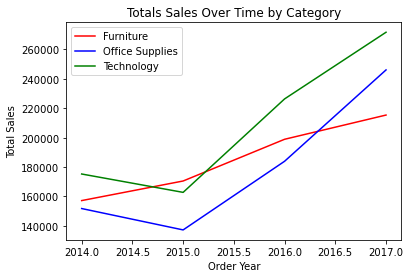

In [7]:
plt.figure()
plt.plot(q1[q1.Category=="Furniture"].OrderYear, q1[q1.Category=="Furniture"].total_sales, color="red",label="Furniture")
plt.plot(q1[q1.Category=="Office Supplies"].OrderYear, q1[q1.Category=="Office Supplies"].total_sales,color="blue",label="Office Supplies")
plt.plot(q1[q1.Category=="Technology"].OrderYear, q1[q1.Category=="Technology"].total_sales, color="green",label="Technology")
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Totals Sales Over Time by Category")

Each sales category is indeed increasing in sales over each year. Office supplies and technology appear to have the steepest increase in sales over time, while Furniture seems to only increase a little bit over the years.

**Question 2.** Do the same analysis for subcategories, concentrating specifically on the subcategories of the categories that perform the best/the worst.

In [8]:
q2 = wh.groupby(["Category","Sub-Category","OrderYear"]).sum().reset_index()
q2[q2["Category"]!="Furniture"].head() # middle of the two categories excluded

,Category,Sub-Category,OrderYear,total_sales,sold_items,total_revenue,total_profit
16,Office Supplies,Appliances,2014,15313.625,314,15313.625,2459.4999
17,Office Supplies,Appliances,2015,23241.289,365,23241.289,2511.8957
18,Office Supplies,Appliances,2016,26050.315,396,26050.315,5301.3415
19,Office Supplies,Appliances,2017,42926.932,654,42926.932,7865.2683
20,Office Supplies,Art,2014,6057.982,613,6057.982,1406.8031


Text(0.5, 1.0, 'Total Sales Over Time by Sub-Category')

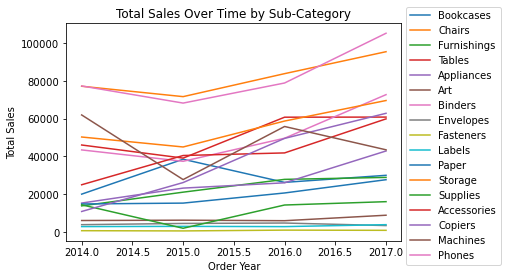

In [9]:
plt.figure()
for sc in q2["Sub-Category"].unique():
    plt.plot(q2[q2["Sub-Category"]==sc].OrderYear, q2[q2["Sub-Category"]==sc].total_sales,label=sc)
plt.legend(bbox_to_anchor=(1,1.1))
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Total Sales Over Time by Sub-Category")

The Sub-Categories that were already higher in sales around 2014 tended to be the ones to increase the most in sales. Sub-Categories like Bookcases and Binders started the highest and went up the most, while Sub-Categories like Copiers and Machines started low and hardly changed at all up to 2017.

**Question 3.** Analyze the categories of the products for profitability by
year. Compare sales numbers and revenue to profit for each category/year.
Are there categories with large revenue and lower than expected profit? How
about the other way around: are there cateogories that generate excellent
profits despite smaller sales/revenue.

Text(0.5, 1.0, 'Total Profit Over Time by Category')

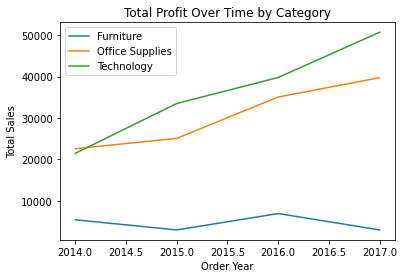

In [10]:
q3 = q1

plt.figure()
for c in q2["Category"].unique():
    plt.plot(q3[q3["Category"]==c].OrderYear, q3[q3["Category"]==c].total_profit,label=c)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Total Profit Over Time by Category")

Text(0.5, 1.0, 'Total Revenue Over Time by Category')

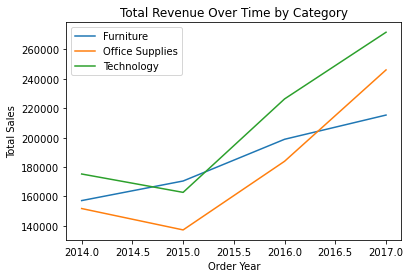

In [11]:
plt.figure()
for c in q2["Category"].unique():
    plt.plot(q3[q3["Category"]==c].OrderYear, q3[q3["Category"]==c].total_revenue,label=c)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Total Revenue Over Time by Category")

Text(0.5, 1.0, 'Profitability (Profit/Sale) Over Time by Category')

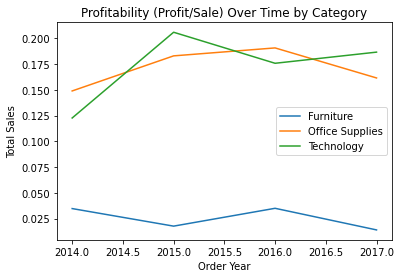

In [12]:
plt.figure()
for c in q2["Category"].unique():
    plt.plot(q3[q3["Category"]==c].OrderYear, q3[q3["Category"]==c].total_profit / q3[q3["Category"]==c].total_sales,label=c)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Profitability (Profit/Sale) Over Time by Category")

Furniture is one category that exprerienced somewhat conflicting profit and revenue behavior. While its revenue steadily increased over time, its profits ended up trending downward.

Technology is another interesting category. It sells the most, but its profitablility interchanges often with that of Office Supplies.

**Question 7.** Analyze relationship between the time between order and
shipment by shipping mode. Is this time the same or different for different
shipping modes? Is the time between order and shipment remaining stable
for each shipment mode over time (year-by-year), or is it changing? If it is
changing - in what direction?

<AxesSubplot:title={'center':'DaysToShip'}, xlabel='Ship Mode'>

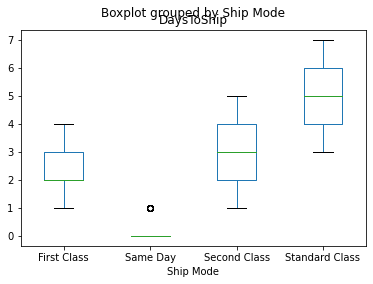

In [13]:
ss.boxplot(by="Ship Mode",column=["DaysToShip"],grid=False)

The time between order and shipment definitely differs beweeen the shipping modes. Same day delivery delivers the fastest, followed by first class, second class, and standard class respectively.

Text(0.5, 1.0, 'Average Time Between Order and Shipment by Year and Category')

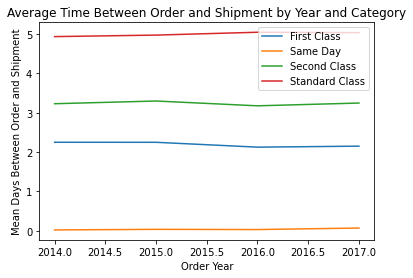

In [14]:
q7 = ss.groupby(["Ship Mode","OrderYear"])["DaysToShip"].mean().reset_index()
for sm in q7["Ship Mode"].unique():
    plt.plot(q7[q7["Ship Mode"]==sm]["OrderYear"],q7[q7["Ship Mode"]==sm]["DaysToShip"],label=sm)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Mean Days Between Order and Shipment")
plt.title("Average Time Between Order and Shipment by Year and Category")

While this time does differ between shipping modes, it does not seem to vary very noticably over time, as shown in this graph of the mean days to ship for each category over time.

**Question 9.** Visualize the relationships between the profit and the quantity of products sold in each category in each month. If using scatterplots,
use size of the dots and their color to incorporate information from other
variables available to you (number of orders, volume of sales, category of
the product, year, etc...). Explain what you see in your visualizations (note,
you can have multiple visualizations here - as many as makes sense for you
to create).

<AxesSubplot:title={'center':'Profit vs Sales by Month'}, xlabel='Profit', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

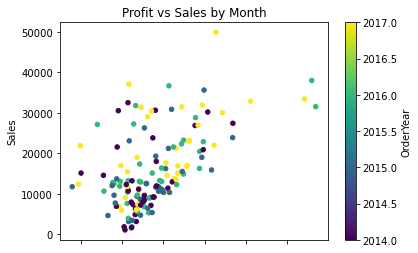

In [15]:
plt.figure()
q9 = ss.groupby(["Category","OrderMonth","OrderYear"]).sum().reset_index()
q9.plot.scatter(x="Profit",y="Sales",c="OrderYear",colormap='viridis',title=("Profit vs Sales by Month"))

<AxesSubplot:title={'center':'Profit vs Sales by Month'}, xlabel='Profit', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

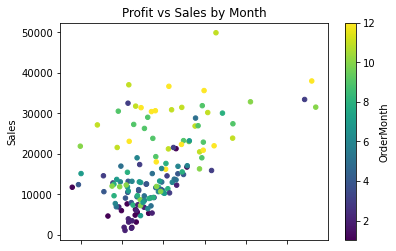

In [16]:
plt.figure()
q9.plot.scatter(x="Profit",y="Sales",c="OrderMonth",colormap='viridis',title=("Profit vs Sales by Month"))

<AxesSubplot:title={'center':'Profit vs Sales by Category'}, xlabel='Profit', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

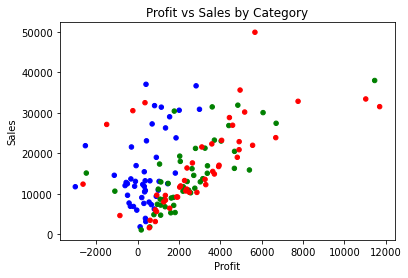

In [17]:
plt.figure()
q9c = {
    "Furniture": "blue",
    "Office Supplies": "green",
    "Technology": "red"
}
q9.plot.scatter(x="Profit",y="Sales",c=q9["Category"].map(q9c),colormap='viridis',title=("Profit vs Sales by Category"))

**Question 11.** Create heatmaps (if you have not done so to answer earlier questions) showing the distributions of orders

• by customer segment and shipment type

• by customer segment and category of product

• by category of product and region

• by region and and month of sale for each year individually

In [18]:
import seaborn as sns
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Pcnt Profit', 'Opos1', 'Opos2', 'OrderMonth', 'OrderDay', 'OrderYear',
       'OrderDateObj', 'Spos1', 'Spos2', 'ShipMonth', 'ShipDay', 'ShipYear',
       'ShipDateObj', 'DaysToShip'],
      dtype='object')

<AxesSubplot:xlabel='Ship Mode', ylabel='Segment'>

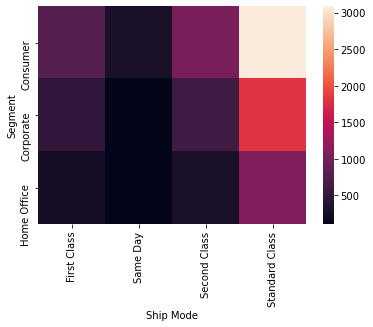

In [19]:
cs_st = ss.groupby(["Segment","Ship Mode"]).count()["Row ID"].unstack()
sns.heatmap(cs_st)

<AxesSubplot:xlabel='Category', ylabel='Segment'>

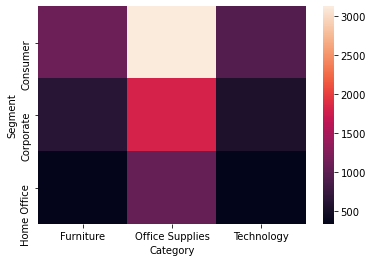

In [20]:
cs_cp = ss.groupby(["Segment","Category"]).count()["Row ID"].unstack()
sns.heatmap(cs_cp)

<AxesSubplot:xlabel='Region', ylabel='Category'>

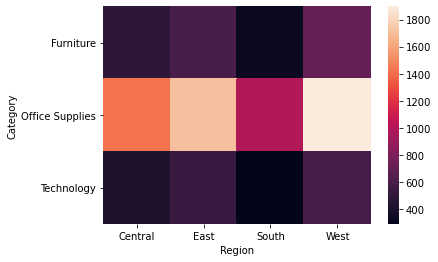

In [21]:
cp_re = ss.groupby(["Category","Region"]).count()["Row ID"].unstack()
sns.heatmap(cp_re)

<AxesSubplot:xlabel='Region', ylabel='OrderYear-OrderMonth'>

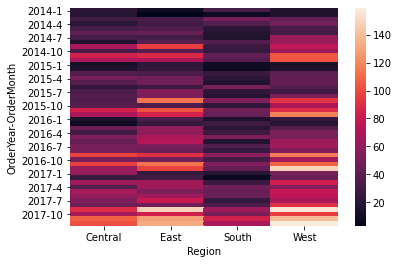

In [22]:
re_mo = ss.groupby(["OrderYear","OrderMonth","Region"]).count()["Row ID"].unstack()
sns.heatmap(re_mo)

**Question 13.** Analyze the distriution of sales by region/state and product
category and customer segment. Describe any interesting things you see.

<AxesSubplot:xlabel='State'>

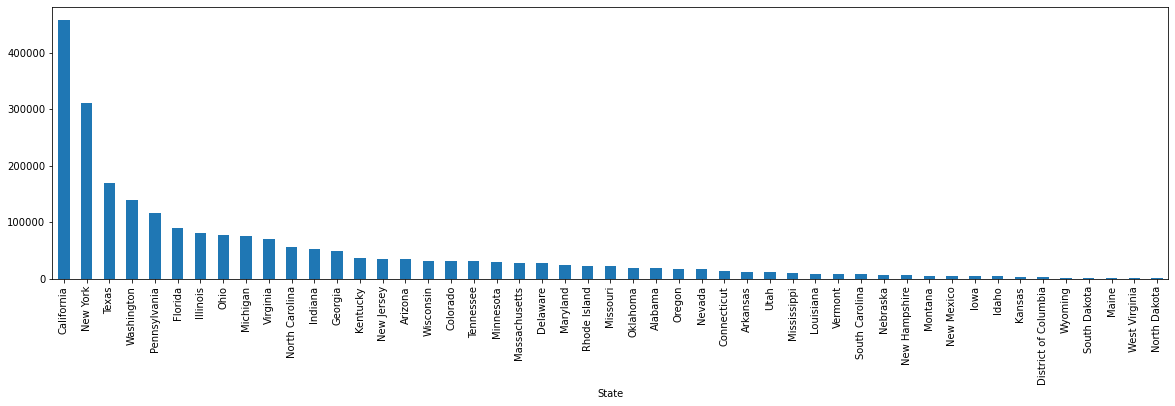

In [23]:
q13a = ss.groupby(["State"])["Sales"].sum().sort_values(ascending=False)
q13a.plot.bar(figsize=(20,5))

This Bar Graph shows how many Sales were recorded in each state in order from highest to lowest. However, Washington isn't even even in the top 10 of state populations, so its large share of the sales must be attributable to something else such as affluence.

<AxesSubplot:xlabel='Region'>

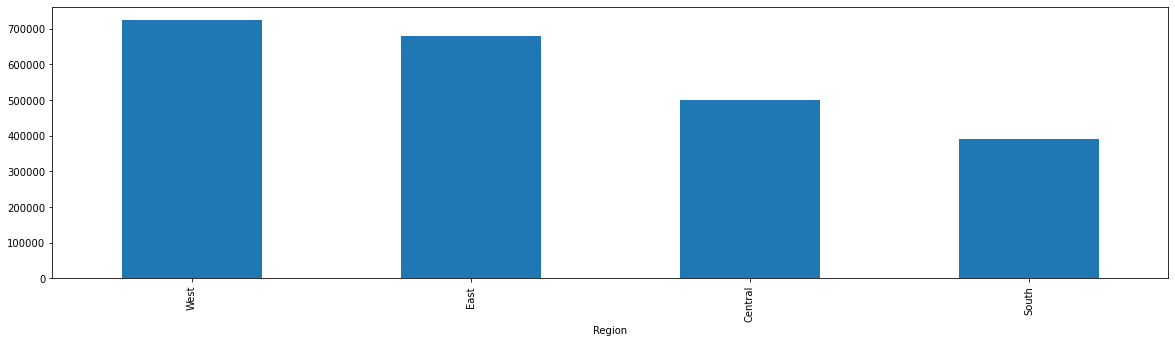

In [24]:
q13b = ss.groupby(["Region"])["Sales"].sum().sort_values(ascending=False)
q13b.plot.bar(stacked=True,figsize=(20,5))


The coastal regions share the largest chunk of sales, likely due to population again. However, there are plenty of people in the South as well, so perhaps they could be marketed to more effectively.

<AxesSubplot:xlabel='Region'>

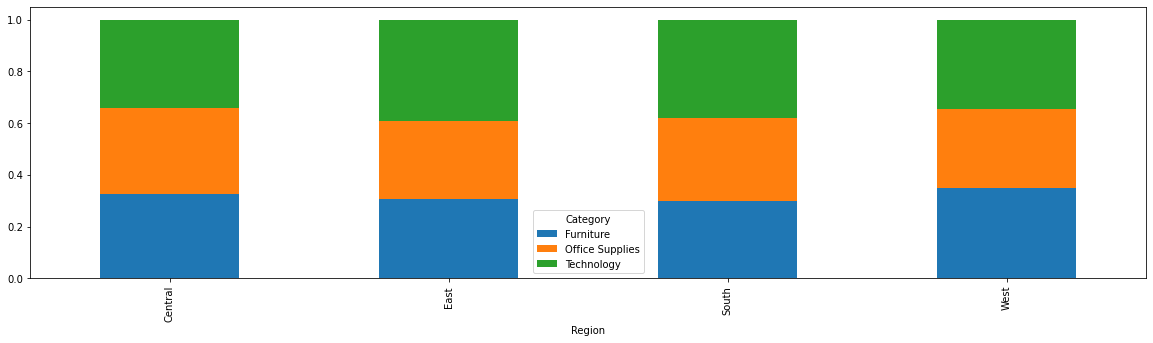

In [25]:
q13c = ss.groupby(["Region","Category"])["Sales"].sum().sort_values(ascending=False).unstack()
q13c = q13c.divide(q13c.sum(axis=1),axis=0)
q13c.plot.bar(figsize=(20,5),stacked=True)

The East appears to buy a higher proportion of technology, while the West buys the highest proportion of furniture.

<AxesSubplot:xlabel='Segment'>

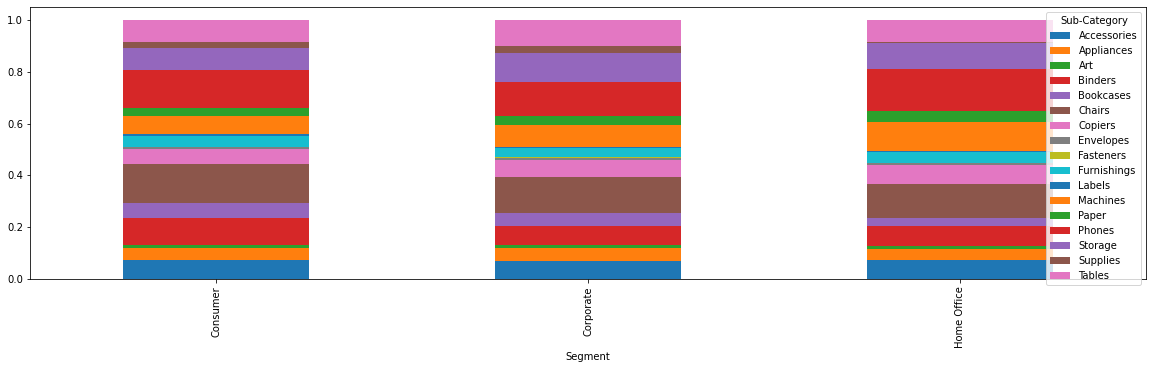

In [26]:
q13d = ss.groupby(["Segment","Sub-Category"])["Sales"].sum().sort_values(ascending=False).unstack()
q13d = q13d.divide(q13d.sum(axis=1),axis=0)
q13d.plot.bar(figsize=(20,5),stacked=True)

It seems that corporate customers buy a higher proportion of bookcases than the others. Home office customers seem to buy the highest proportion of binders.

<AxesSubplot:xlabel='Segment'>

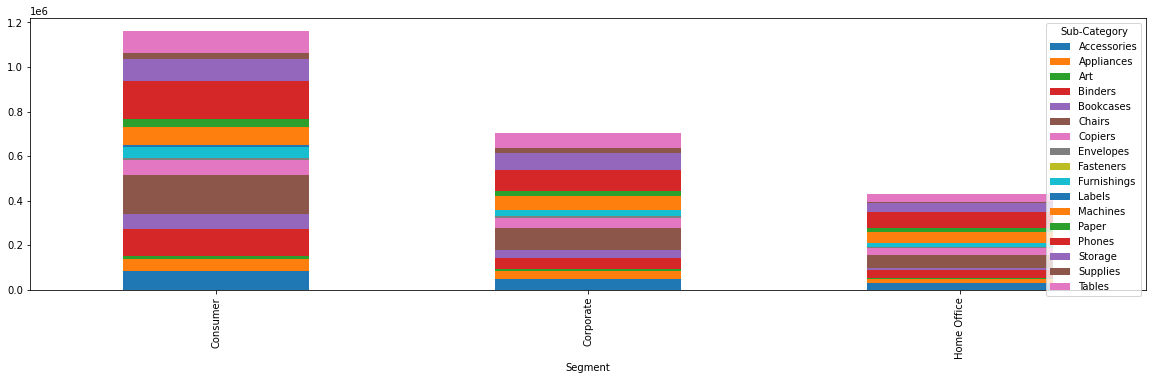

In [27]:
q13e = ss.groupby(["Segment","Sub-Category"])["Sales"].sum().sort_values(ascending=False).unstack()
# q13e = q13e.divide(q13e.sum(axis=1),axis=0)
q13e.plot.bar(figsize=(20,5),stacked=True)

However, consumers buy the highest quantity of pretty much all subcategoreies compared to the other two customer segments.